# **Phishing Website Detection by Machine Learning Techniques**



In [155]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()

Domain  Have_IP  Have_At  URL_Length  URL_Depth  Redirection  \
0  graphicriver.net        0        0           1          1            0   
1         ecnavi.jp        0        0           1          1            1   
2      hubpages.com        0        0           1          1            0   
3   extratorrent.cc        0        0           1          3            0   
4     icicibank.com        0        0           1          3            0   

   https_Domain  TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  \
0             0        0              0           0            1           1   
1             0        0              0           0            1           1   
2             0        0              0           0            1           0   
3             0        0              0           0            1           0   
4             0        0              0           0            1           0   

   Domain_End  iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0           1       0           0            1             0      0  
1           1       0           0            1             0      0  
2           1       0           0            1             0      0  
3           1       0           0            1             0      0  
4           1       0           0            1             0      0

In [157]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [158]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [159]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

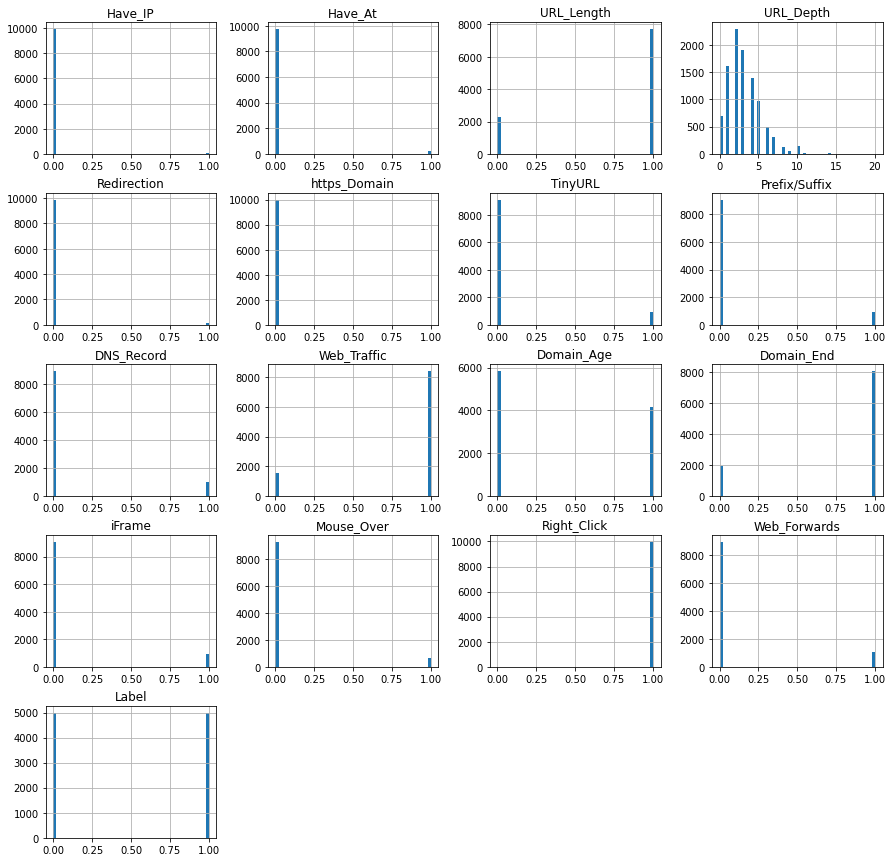

In [160]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

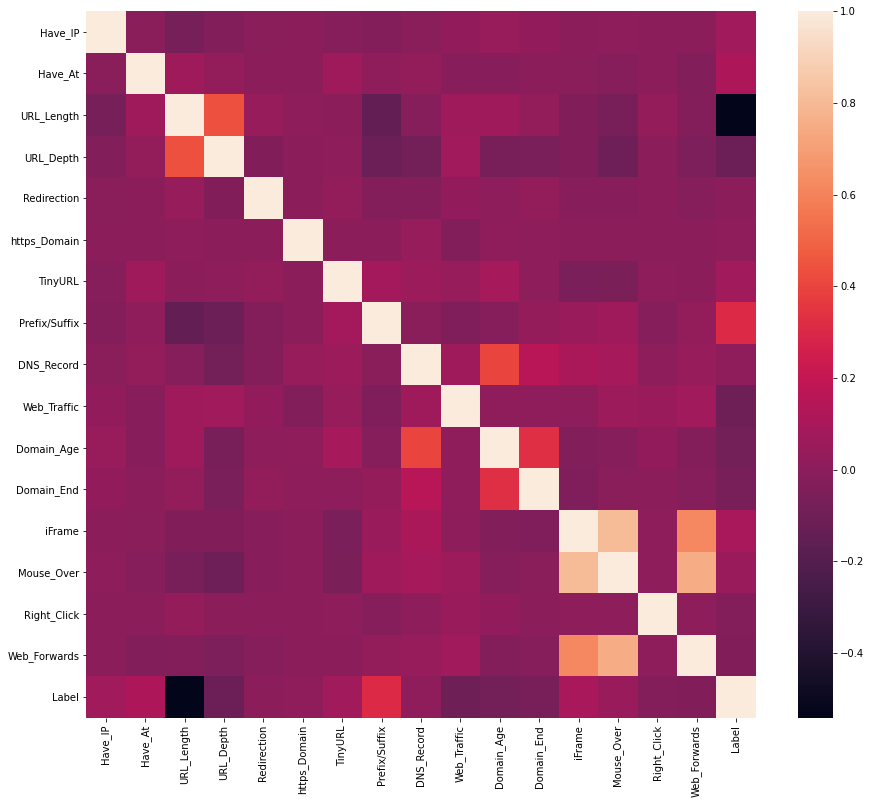

In [161]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [162]:
data0.describe()

Have_IP       Have_At    URL_Length     URL_Depth   Redirection  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.005500      0.022600      0.773400      3.072000      0.013500   
std        0.073961      0.148632      0.418653      2.128631      0.115408   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      2.000000      0.000000   
50%        0.000000      0.000000      1.000000      3.000000      0.000000   
75%        0.000000      0.000000      1.000000      4.000000      0.000000   
max        1.000000      1.000000      1.000000     20.000000      1.000000   

       https_Domain       TinyURL  Prefix/Suffix    DNS_Record   Web_Traffic  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean       0.000200      0.090300       0.093200      0.100800      0.845700   
std        0.014141      0.286625       0.290727      0.301079      0.361254   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      1.000000   
50%        0.000000      0.000000       0.000000      0.000000      1.000000   
75%        0.000000      0.000000       0.000000      0.000000      1.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

         Domain_Age  Domain_End        iFrame   Mouse_Over  Right_Click  \
count  10000.000000  10000.0000  10000.000000  10000.00000  10000.00000   
mean       0.413700      0.8099      0.090900      0.06660      0.99930   
std        0.492521      0.3924      0.287481      0.24934      0.02645   
min        0.000000      0.0000      0.000000      0.00000      0.00000   
25%        0.000000      1.0000      0.000000      0.00000      1.00000   
50%        0.000000      1.0000      0.000000      0.00000      1.00000   
75%        1.000000      1.0000      0.000000      0.00000      1.00000   
max        1.000000      1.0000      1.000000      1.00000      1.00000   

       Web_Forwards         Label  
count  10000.000000  10000.000000  
mean       0.105300      0.500000  
std        0.306955      0.500025  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.500000  
75%        0.000000      1.000000  
max        1.000000      1.000000

In [163]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [164]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [165]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
0        0        0           0          0            0             0   
1        0        0           1          9            0             0   
2        0        0           1          4            0             0   
3        0        0           1          2            0             0   
4        0        0           1          2            0             0   

   TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  \
0        0              0           0            1           0           0   
1        0              0           0            1           1           1   
2        0              0           0            1           0           1   
3        0              0           0            1           1           1   
4        0              0           0            1           0           1   

   iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0       0           0            1             0      1  
1       0           0            1             0      1  
2       0           0            1             0      1  
3       0           0            1             0      0  
4       0           0            1             0      0

## ** Splitting the Data**

In [166]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [167]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [168]:
def cm_to_inch(value):
    return value/2.54

In [169]:
#importing packages
from sklearn.metrics import accuracy_score

In [170]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### ** Random Forest Classifier**


In [178]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [179]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**graph**

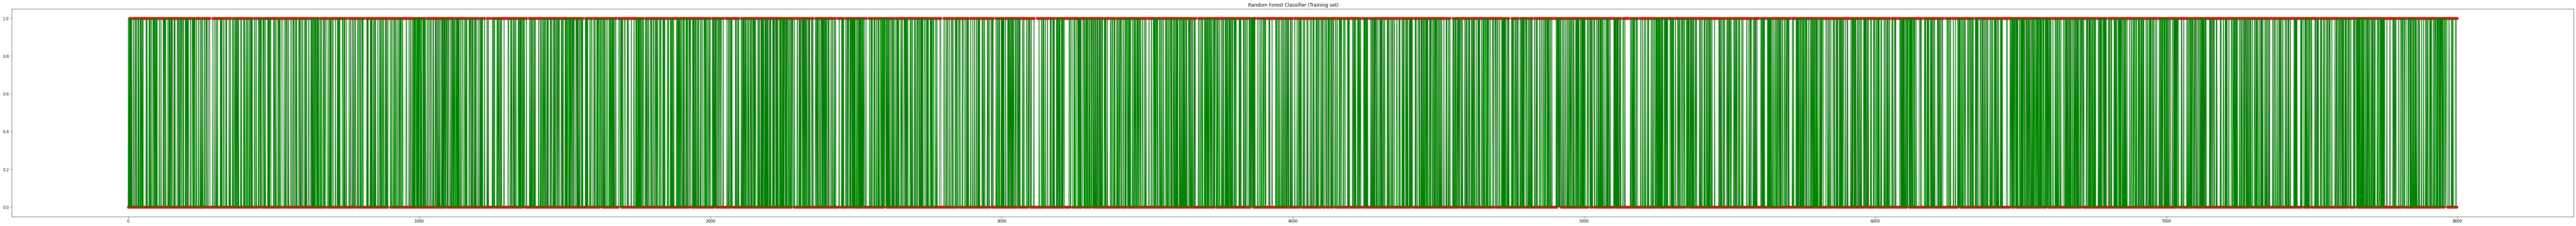

In [180]:
# Random Forest Classifier training data prediction
x_train=np.arange(0,len(X_train),1)
plt.figure(figsize=(cm_to_inch(300),cm_to_inch(25)))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, y_train_forest, color = "green")
plt.title(" Random Forest Classifier (Training set)")
plt.show()

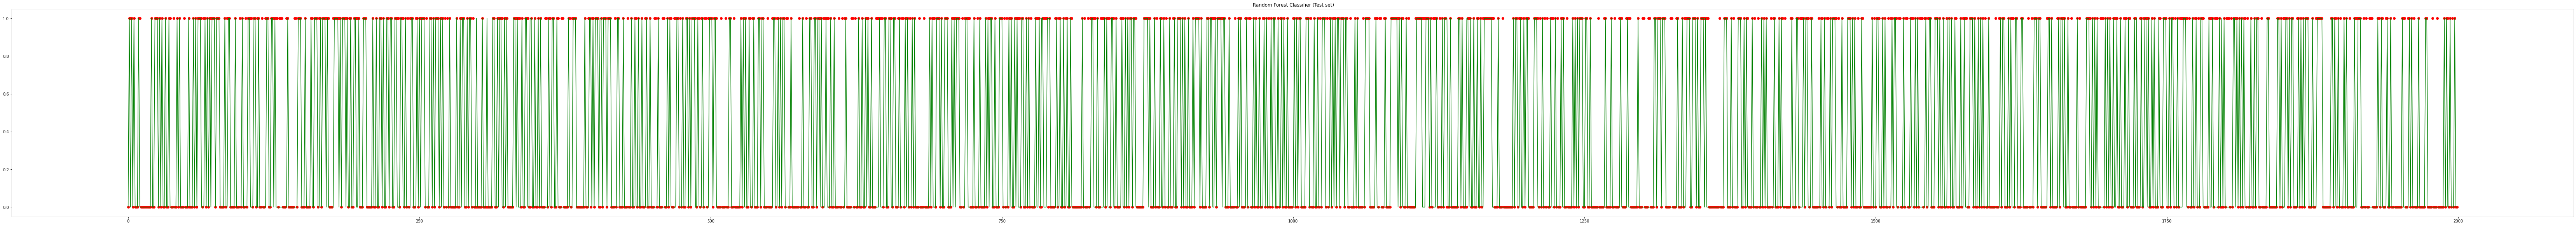

In [181]:
# Random Forest Classifier testing data prediction
x_test=np.arange(0,len(X_test),1)
plt.figure(figsize=(cm_to_inch(300),cm_to_inch(25)))
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_test_forest, color = "green")
plt.title(" Random Forest Classifier (Test set)")
plt.show()

**Performance Evaluation:**

In [182]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.821
Random forest: Accuracy on test Data: 0.815


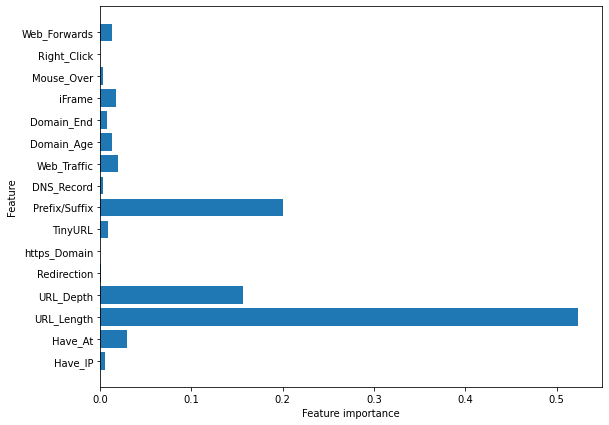

In [183]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [184]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### ** XGBoost Classifier**


In [191]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

e:\outside_project\navya(cambridge)\phishing_site_detection\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

e:\outside_project\navya(cambridge)\phishing_site_detection\venv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


**Performance Evaluation:**

In [193]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.868
XGBoost : Accuracy on test Data: 0.859


**graph**

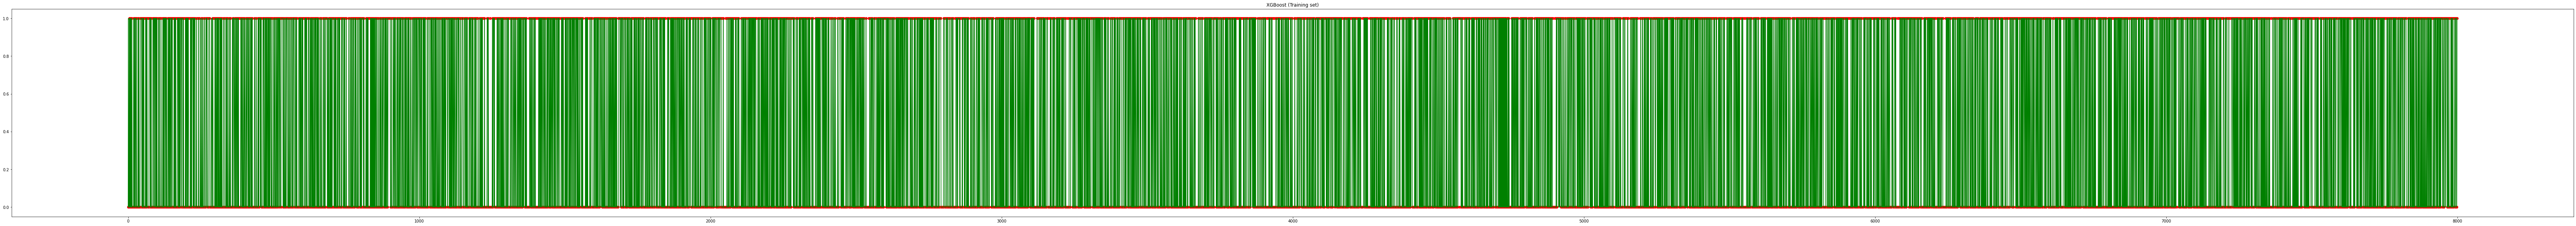

In [194]:
#xgboast training data prediction
x_train=np.arange(0,len(X_train),1)
plt.figure(figsize=(cm_to_inch(300),cm_to_inch(25)))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, y_train_xgb, color = "green")
plt.title("XGBoost (Training set)")
plt.show()

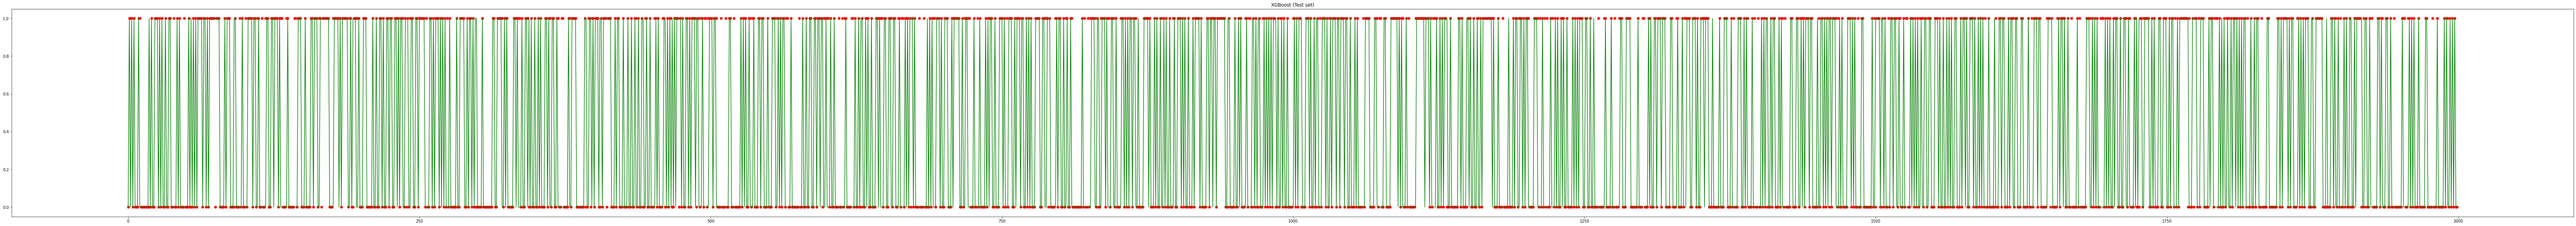

In [195]:
#xgboast testing data prediction
x_test=np.arange(0,len(X_test),1)
plt.figure(figsize=(cm_to_inch(300),cm_to_inch(25)))
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_test_xgb, color = "green")
plt.title("XGBoost (Test set)")
plt.show()

**Storing the results:**

In [196]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.5. Autoencoder Neural Network**
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [197]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [198]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 14)                238       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
Total params: 1,294
Trainable params: 1,294
Non-trainable params: 0
_________________________________________________________

In [199]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 2s 5ms/step - loss: 0.8594 - accuracy: 0.3316 - val_loss: -1.3189 - val_accuracy: 0.8419
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: -1.4597 - accuracy: 0.8378 - val_loss: -1.5444 - val_accuracy: 0.8419
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: -1.6258 - accuracy: 0.8372 - val_loss: -1.5784 - val_accuracy: 0.7931
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: -1.6246 - accuracy: 0.7370 - val_loss: -1.6161 - val_accuracy: 0.4450
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: -1.6846 - accuracy: 0.3469 - val_loss: -1.6921 - val_accuracy: 0.3450
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: -1.7110 - accuracy: 0.3304 - val_loss: -1.7122 - val_accuracy: 0.3594
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: -1.8181 - accuracy: 0.3507 - val_loss: -1.7301 - val_accuracy: 

**graph**

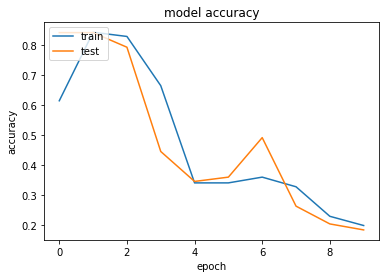

In [200]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

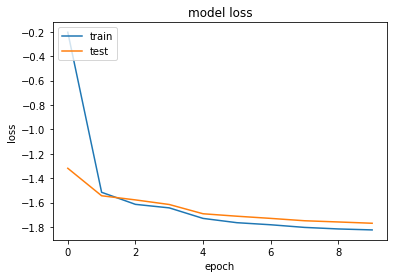

In [201]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Performance Evaluation:**

In [202]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 2ms/step - loss: -1.8171 - accuracy: 0.1760

Autoencoder: Accuracy on training Data: 0.179
Autoencoder: Accuracy on test Data: 0.176


**Storing the results:**

In [203]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### ** Support Vector Machines**



In [204]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [205]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [206]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.801
SVM : Accuracy on test Data: 0.802


**graph**

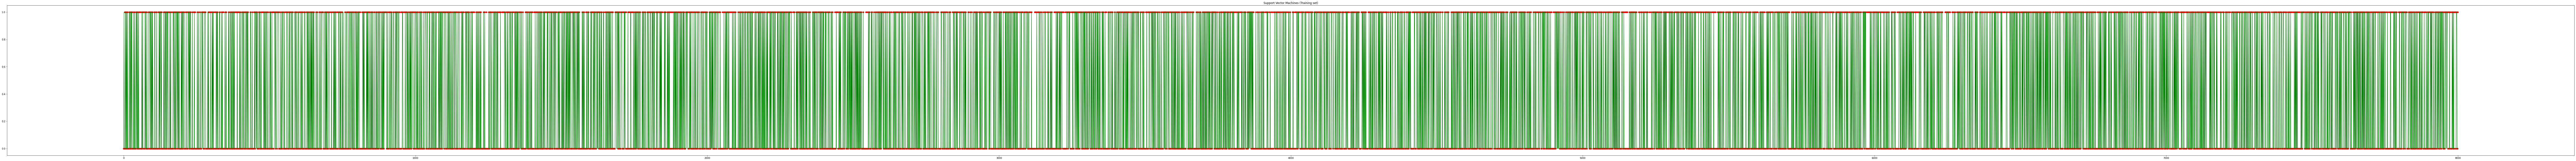

In [207]:
#svm traing data prediction
x_train=np.arange(0,len(X_train),1)
plt.figure(figsize=(cm_to_inch(500),cm_to_inch(30)))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, y_train_svm, color = "green")
plt.title("Support Vector Machines (Training set)")
plt.show()

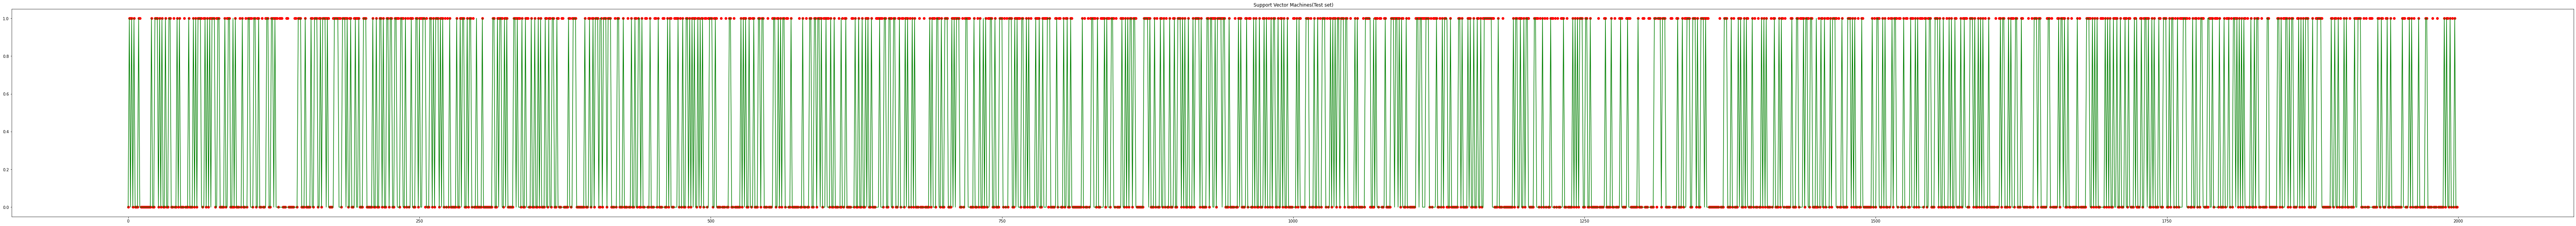

In [208]:
#svm testing data prediction
x_test=np.arange(0,len(X_test),1)
plt.figure(figsize=(cm_to_inch(300),cm_to_inch(25)))
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_test_svm, color = "green")
plt.title(" Support Vector Machines(Test set)")
plt.show()

**Storing the results:**

In [209]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

# **linear regression**


In [210]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [211]:
#predicting the target value from the model for the samples
y_test_linear = linear.predict(X_test)
y_train_linear = linear.predict(X_train)

**Performance Evaluation:**

In [212]:
#computing the accuracy of the model performance
acc_train_linear = accuracy_score(y_train,y_train_linear.round())
acc_test_linear = accuracy_score(y_test,y_test_linear.round())

print("linear: Accuracy on training Data: {:.3f}".format(acc_train_linear))
print("linear : Accuracy on test Data: {:.3f}".format(acc_test_linear))

linear: Accuracy on training Data: 0.800
linear : Accuracy on test Data: 0.795


**Graph**


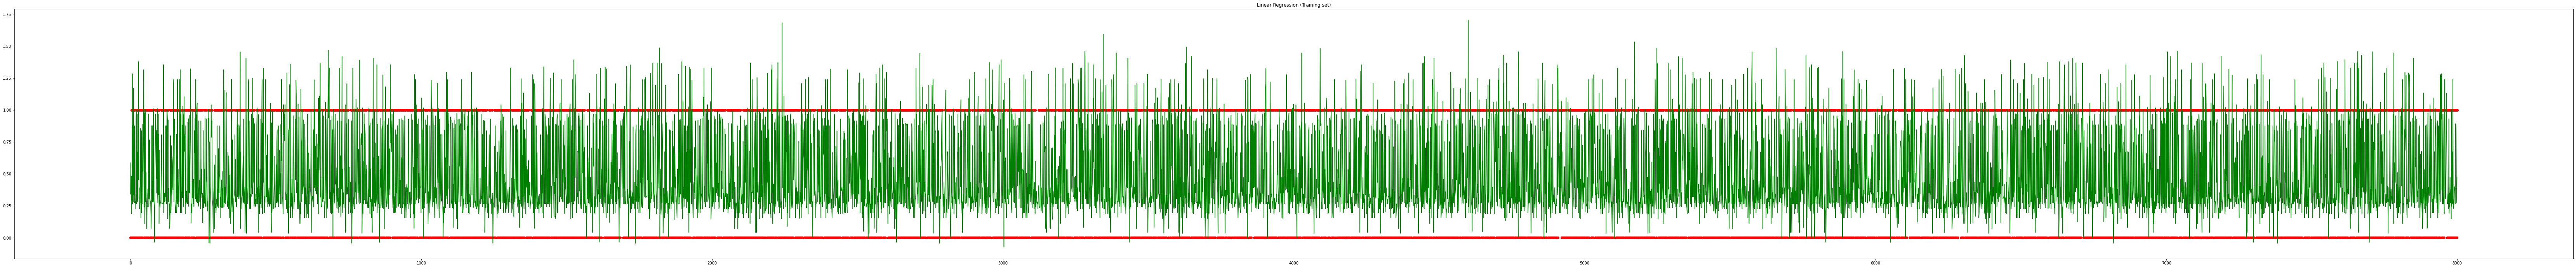

In [213]:
#linear traing data prediction
x_train=np.arange(0,len(X_train),1)
plt.figure(figsize=(cm_to_inch(300),cm_to_inch(30)))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, y_train_linear, color = "green")
plt.title("Linear Regression (Training set)")
plt.show()

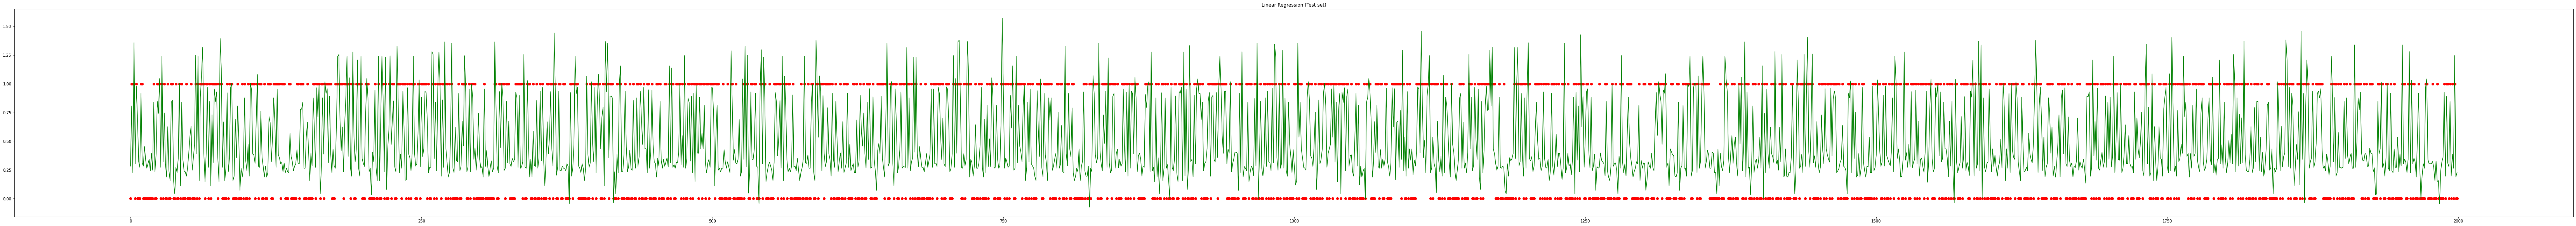

In [214]:
#linear testing data prediction
x_test=np.arange(0,len(X_test),1)
plt.figure(figsize=(cm_to_inch(300),cm_to_inch(25)))
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_test_linear, color = "green")
plt.title("Linear Regression (Test set)")
plt.show()

Storing the results:

In [215]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('linear', acc_train_svm, acc_test_svm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [216]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

ML Model  Train Accuracy  Test Accuracy
0           Decision Tree           0.814          0.810
1           Random Forest           0.821          0.815
2  Multilayer Perceptrons           0.865          0.855
3                 XGBoost           0.868          0.859
4             AutoEncoder           0.179          0.176
5                     SVM           0.802          0.802
6                  linear           0.802          0.802

In [217]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model  Train Accuracy  Test Accuracy
3                 XGBoost           0.868          0.859
2  Multilayer Perceptrons           0.865          0.855
1           Random Forest           0.821          0.815
0           Decision Tree           0.814          0.810
5                     SVM           0.802          0.802
6                  linear           0.802          0.802
4             AutoEncoder           0.179          0.176

For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [218]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In [219]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/
